In [1]:
import pandas as pd



In [2]:
df = pd.DataFrame({'Origin' : ['A','A','A','B','B','A'], 
                   'Destination' :['B','C','D','C','D','D'], 
                   'X' : ['a','b', 'c', 'd', 'e', 'f']})


I = pd.DataFrame({'Origin' : ['A','A','B'], 'Destination' : ['B','D','C']})


In [3]:
print (pd.merge(df,I))

  Origin Destination  X
0      A           B  a
1      A           D  c
2      A           D  f
3      B           C  d


In [4]:
print (pd.merge(I,df, on=['Origin','Destination'])[['Origin','Destination','X']])

  Origin Destination  X
0      A           B  a
1      A           D  c
2      A           D  f
3      B           C  d


In [5]:
radius = 1
ped_radius = 0.195
signma = 0.7

def gaussian_pdf(sigma, x, radius):
    zaehler = ((radius*2)**2) * np.sqrt(3)  # S_p
    nenner = 2 * 2 * np.pi * (sigma**2)

    normalization_factor = zaehler/nenner
    individual_density = normalization_factor * \
        np.exp(-x / (2 * np.square(sigma)))

    return individual_density

def gauss_filter():
    x_range = np.linspace(-radius,radius,5)
    xx, yy = np.meshgrid(x_range,x_range, sparse=False)
    grid = np.sqrt(np.square(xx) + np.square(yy))
    gauss = np.vectorize(gaussian_pdf)
    gauss_grid = gauss(signma, grid, ped_radius)
    print(gauss_grid)
    return gauss_grid


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.01010565 0.01367158 0.01542149 0.01367158 0.01010565]
 [0.01367158 0.02079333 0.02568651 0.02079333 0.01367158]
 [0.01542149 0.02568651 0.04278425 0.02568651 0.01542149]
 [0.01367158 0.02079333 0.02568651 0.02079333 0.01367158]
 [0.01010565 0.01367158 0.01542149 0.01367158 0.01010565]]
Convolution 0.00042510032653808594


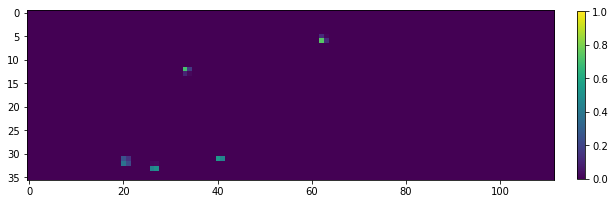

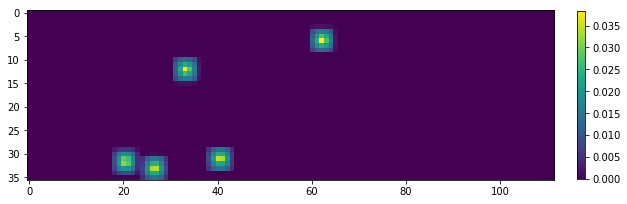

max 0.03825887257146359


In [10]:
from scipy.sparse import bsr_matrix
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.sparse as sps
from pylab import matshow
import time
#x = np.array([270, 343, 435, 519, 798])
#y = np.array([330, 338, 173, 388, 77])
res = 500

x = np.array([10815.8, 13734.4, 17402.9, 20771.8, 31930.4])
y = np.array([16200.46, 16527.29, 6939.13, 15504.83, 3069.66])

data = np.zeros((18000//res,56000//res))

print(data)

for j in range(0,len(x)):
    
    lowerLeftX = int((x[j]-1)/res)
    lowerLeftY = int((y[j]-1)/res)
    cordX = x[j]/res
    cordY = y[j]/res
    
    dx = abs(cordX - lowerLeftX)
    dy = abs(cordY - lowerLeftY)
    
    w1 = dx*dy
    w2 = dx*(1-dy)
    w3 = (1-dx)*dy
    w4 = (1-dx)*(1-dy)
    
    if abs(w1+w2+w3+w4 - 1) != 0:
        print("error")
    
    data[lowerLeftY-1,lowerLeftX-1] = w1
    data[lowerLeftY, lowerLeftX-1] = w2
    data[lowerLeftY-1, lowerLeftX] = w3
    data[lowerLeftY, lowerLeftX] = w4


gsfilter = gauss_filter()

tick0 = time.time()
density = signal.convolve2d(data,gsfilter, mode='same')
tick1 = time.time() - tick0

print("Convolution",tick1)

plt.figure(figsize = (10,10)) # creates a figure 10 inches by 10 inches
plt.imshow(data)
plt.clim(0,1)
plt.colorbar(fraction=0.015, pad=0.04)
plt.show()


plt.figure(figsize = (10,10)) # creates a figure 10 inches by 10 inches
plt.imshow(density)
#plt.clim(0,1)
plt.colorbar(fraction=0.015, pad=0.04)
plt.show()

print("max",np.max(density))
#plt.spy(data)
#plt.show()